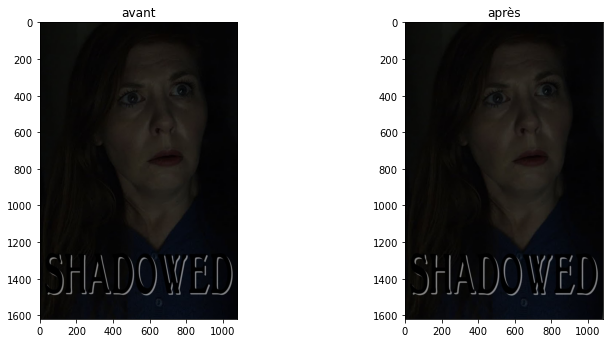

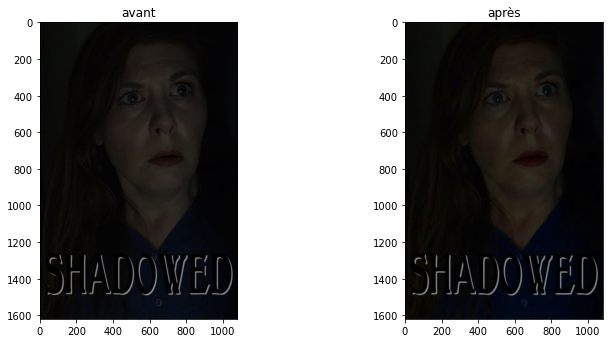

0.06942758008553214
used coef : 1.5


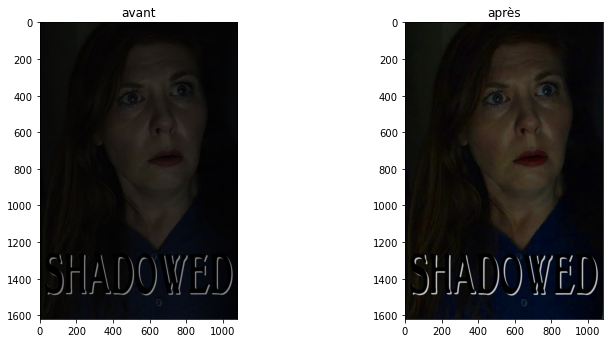

In [92]:
from skimage.io import imread,imsave,imshow
from matplotlib import pyplot as plt
from skimage.color import rgb2hsv, hsv2rgb
import numpy as np
from skimage.filters.rank import mean, median
from skimage.morphology import square 

#this project has been tested with the images balloons_noisy.png, nyc.jpg and etretat.jpg, shadow.jpg

%matplotlib inline

im_init = imread("shadow.jpg")
im = imread("shadow.jpg")

#1 remove the noise with a median filter, for each color of the image, the mean filter keeps the sharp edges  

r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

s = square(4)

im[:,:,0]=median(r,s)
im[:,:,1]=median(g,s)
im[:,:,2]=median(b,s)


plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(im_init)
plt.title('avant')
plt.subplot(2,2,2)
plt.imshow(im)
plt.title('après')
plt.show()


#2 increase the image saturation, the colors will then seem brighter 

hsv = rgb2hsv(im)

sat = hsv[:, :, 1]

for i in range(im.shape[0]) : 
    for j in range(im.shape[1]) : 
        if sat[i,j]*1.5 > 1 : 
            sat[i,j] = 1
        else : 
            sat[i,j] *=1.5

im = hsv2rgb(hsv)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(im_init)
plt.title('avant')
plt.subplot(2,2,2)
plt.imshow(im)
plt.title('après')
plt.show()


#2 increase the image value - choose the coeff depending on the actual value of the image 

def enhance_val (im, val, coef) : 
    print("used coef :",coef)
    for i in range(im.shape[0]) : 
        for j in range(im.shape[1]) : 
            if val[i,j]*coef > 1 : 
                val[i,j] = 1
            else : 
                val[i,j] *= coef

    im = hsv2rgb(hsv)
    
    return val

hsv = rgb2hsv(im)
val = hsv[:, :, 2]

meanvalue = val[: , :].sum()/im.shape[0]/im.shape[1]
print(meanvalue)

if meanvalue < 0.3 : 
    hsv[:,:,2] = enhance_val(im, val, 1.5)
elif 0.3 < meanvalue < 0.6 :
    hsv[:,:,2] = enhance_val(im, val, 1.2)

im = hsv2rgb(hsv)

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(im_init)
plt.title('avant')
plt.subplot(2,2,2)
plt.imshow(im)
plt.title('après')
plt.show()
